In [1]:
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Create a plotting definition

In [20]:
def plot_map(ax,data):
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    if nplt < 6:
        gl.ylabels_right = False
    if nplt > 2: 
        gl.ylabels_left = False
    if(nplt)%3 != 0:
        gl.xlabels_top = False
    if((nplt)%3 ==0 or (nplt-1)%3 ==0):
        gl.xlabels_bottom = False
    # Defining cmap based on plot type: all difference plots are on the bottom, position divisible by 3 (after adding 1)
    #if (nplt+1)% 3 == 0:
    #    cmap = 'bwr'
    #else:
    #    vmin
    #    cmap='nipy_spectral'
    cmap=mymap
    ax.pcolor(lon_crn,lat_crn,data[1:-1,1:-1],vmin=vmin[nplt],vmax=vmax[nplt],cmap=cmap)
    
    #ax.set_ylim(-55,15) #Humboldt
    #ax.set_xlim(-120,-60) #HUMBOLDT
    #ax.set_xlim(-180,-100) #CCS
    #ax.set_ylim(20,60) #CCS
    ax.set_ylim(-55,55)# EPO
    ax.set_xlim(-140,-60)# EPO
    

In [18]:
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.Blues(np.linspace(1, 0, 128))
colors2 = plt.cm.hot(np.linspace(1, 0, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

Objective: Making a figure with 3x3 plots showing the Humboldt Current System. All maps are the same area so we can itterate over the different data files and create the same map over and over but for different variables. 

-1.2781265 28.861235
0.106367 31.315077
-0.40905952 11.349706
6.291108e-05 0.120492734
0.00013157279 0.089100994
-0.03139174 0.008536834
3.5360063e-08 1.3925682e-06
3.129191e-08 1.3815472e-06
-3.436475e-07 2.1450239e-07


Text(0.5, 1.0, 'PP')

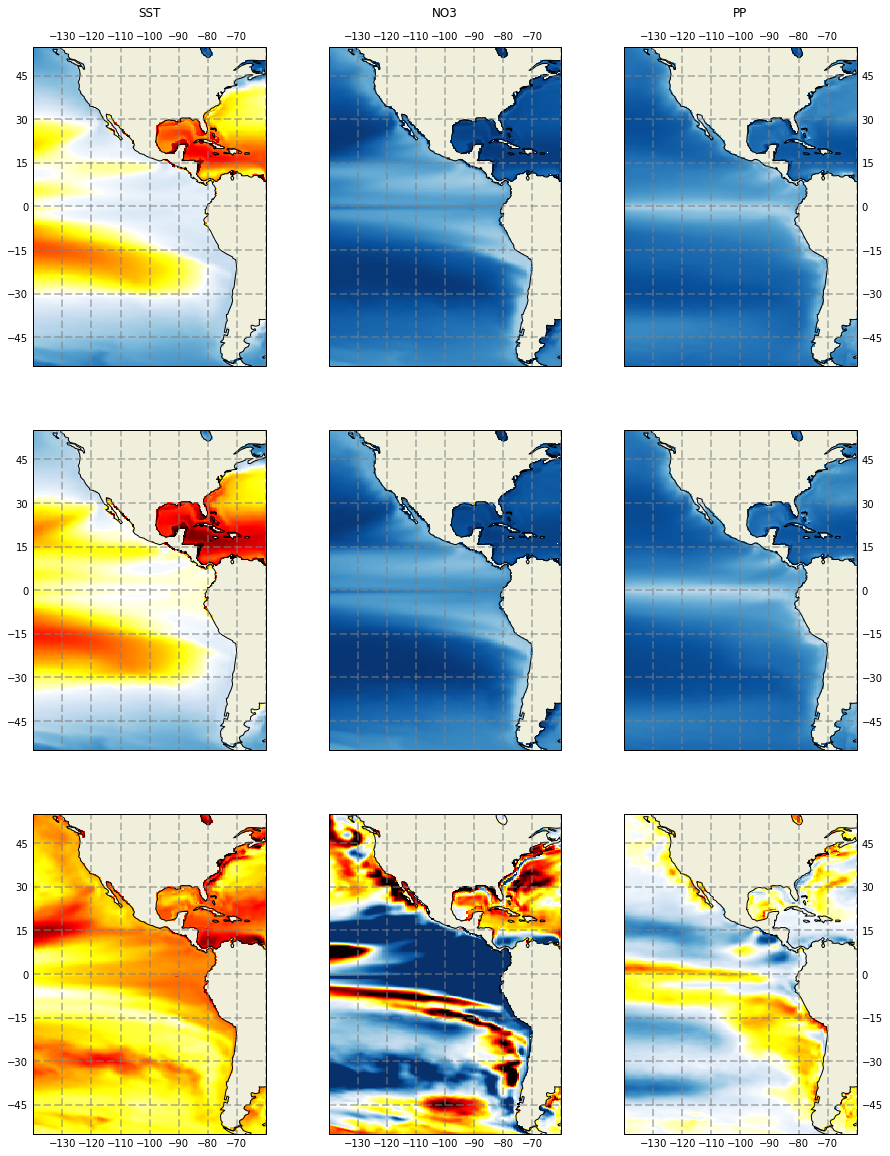

In [21]:
mod_vars = ['thetao', 'no3', 'intpp']
#mod_tims = ['0961-1000','2061-2100']
mod_tims = ['0312-0351','2061-2100']

#vmin = [0.5, 0.5, -3,   0,   0, -.002,     0,     0, -2e-7]
#vmax = [31,   31,  3, 0.1, 0.1,  .002, 4e-06, 4e-06,  2e-7]

vmin = [0,   0, -5,   0,   0, -.002,     0,     0, -2e-7]
vmax = [30, 30,  5, 0.1, 0.1,  .002, 3e-06, 3e-06,  2e-7]

proj = ccrs.PlateCarree()
#fig, axs = plt.subplots(3,3,subplot_kw=dict(projection=proj),figsize=(20, 10))
#fig, axs = plt.subplots(3,3,subplot_kw=dict(projection=proj),figsize=(10, 10))
fig, axs = plt.subplots(3,3,subplot_kw=dict(projection=proj),figsize=(15, 20)) #EPO

nplt=0
for var in mod_vars:
    var_dif = None
    for tim in mod_tims: 
        mod_fil = var + '_' + tim + '_int_EPO.nc'
        fid = nc.Dataset(mod_fil)
        var_val = fid.variables[var][:].squeeze()
        if nplt==0:
            xh = fid.variables['xh'][:].squeeze()
            yh = fid.variables['yh'][:].squeeze()
            lon_crn, lat_crn = np.meshgrid((xh[1:]+xh[:-1])/2,(yh[1:]+yh[:-1])/2)
        plot_map(axs.T.flatten()[nplt],var_val)
        print(np.min(var_val), np.max(var_val))
        nplt+=1
        if var_dif is None: 
            var_dif = var_val
        else:
            var_dif = var_val-var_dif
            # plot difference 
            plot_map(axs.T.flatten()[nplt],var_dif)
            print(np.min(var_dif), np.max(var_dif))
            nplt+=1
            
axs.T.flatten()[0].set_title('SST',pad=30)
axs.T.flatten()[3].set_title('NO3',pad=30)
axs.T.flatten()[6].set_title('PP',pad=30)